**Nombre: Arturo Garza Campuzano**

**Matrícula: A00828096**

# Construcción de un modelo estadístico base

El propósito de esta evidencia es constuir un modelo estadístico base para resolver la problemática planteada en el siguiente documento: [Tecnicas_Procesamiento.ipynb](https://colab.research.google.com/drive/1xNTAiT0HxwH6ZobAtwwPABOOWYzDBRWk?usp=sharing). Además de plantear la problemática, en este documento se seleccionaron seis variables después de realizar un análisis sobre la base de datos y se exportaron en el siguiente archivo: [autos_variables.csv](https://drive.google.com/file/d/1USI8Kxa0fY4evUKdJjraBw8rFQw0_CQ3/view?usp=sharing).

Las preguntas bases de la probelmática son:
- ¿Qué variables son significativas para predecir el precio de un automóvil?
- ¿Qué tan bien describen esas variables el precio de un automóvil?

Para responder a estas dos preguntas se utilizarán la regresión lineal múltiple, regresión lineal simple y el anova para encontrar el modelo ideal para decribir el precio de los automóviles.

## Importar módulos

In [52]:
# Importación de librerías
import pandas as pd
import numpy as np
import random as rnd
import math
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Cargar datos

In [53]:
# Este bloque de codigo no es necesario si el archivo esta guardado localmente
from google.colab import drive
drive.mount('/content/drive')

# Dataframe del conjunto de datos
autos_df = pd.read_csv('/content/drive/MyDrive/TC3006C101_A00828096/Estadistica/autos_variables.csv')
autos_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,enginesize,wheelbase,carheight,peakrpm,drivewheel,enginetype,price
0,130,88.6,48.8,5000,rwd,dohc,13495.0
1,130,88.6,48.8,5000,rwd,dohc,16500.0
2,152,94.5,52.4,5000,rwd,ohcv,16500.0
3,109,99.8,54.3,5500,fwd,ohc,13950.0
4,136,99.4,54.3,5500,4wd,ohc,17450.0
...,...,...,...,...,...,...,...
200,141,109.1,55.5,5400,rwd,ohc,16845.0
201,141,109.1,55.5,5300,rwd,ohc,19045.0
202,173,109.1,55.5,5500,rwd,ohcv,21485.0
203,145,109.1,55.5,4800,rwd,ohc,22470.0


## Exploración de la base de datos

### Medidas estadísticas

In [54]:
autos_df.describe()

,enginesize,wheelbase,carheight,peakrpm,price
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.907317,98.756585,53.724878,5125.121951,13276.710571
std,41.642693,6.021776,2.443522,476.985643,7988.852332
min,61.000000,86.600000,47.800000,4150.000000,5118.000000
25%,97.000000,94.500000,52.000000,4800.000000,7788.000000
50%,120.000000,97.000000,54.100000,5200.000000,10295.000000
75%,141.000000,102.400000,55.500000,5500.000000,16503.000000
max,326.000000,120.900000,59.800000,6600.000000,45400.000000


### Correlación

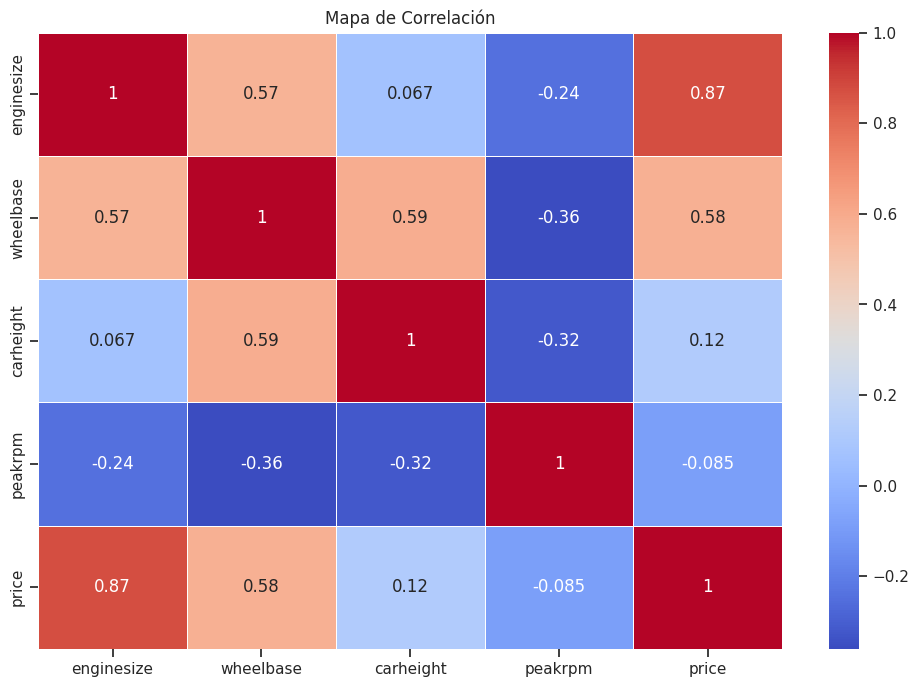

In [55]:
# Selecciona solo las variables numéricas (tipo float64 e int64)
numeric_columns = autos_df.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
corr_matrix = numeric_columns.corr()

# Crea un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlación')

# Muestra el mapa de calor
plt.show()

### Matriz de dispersión

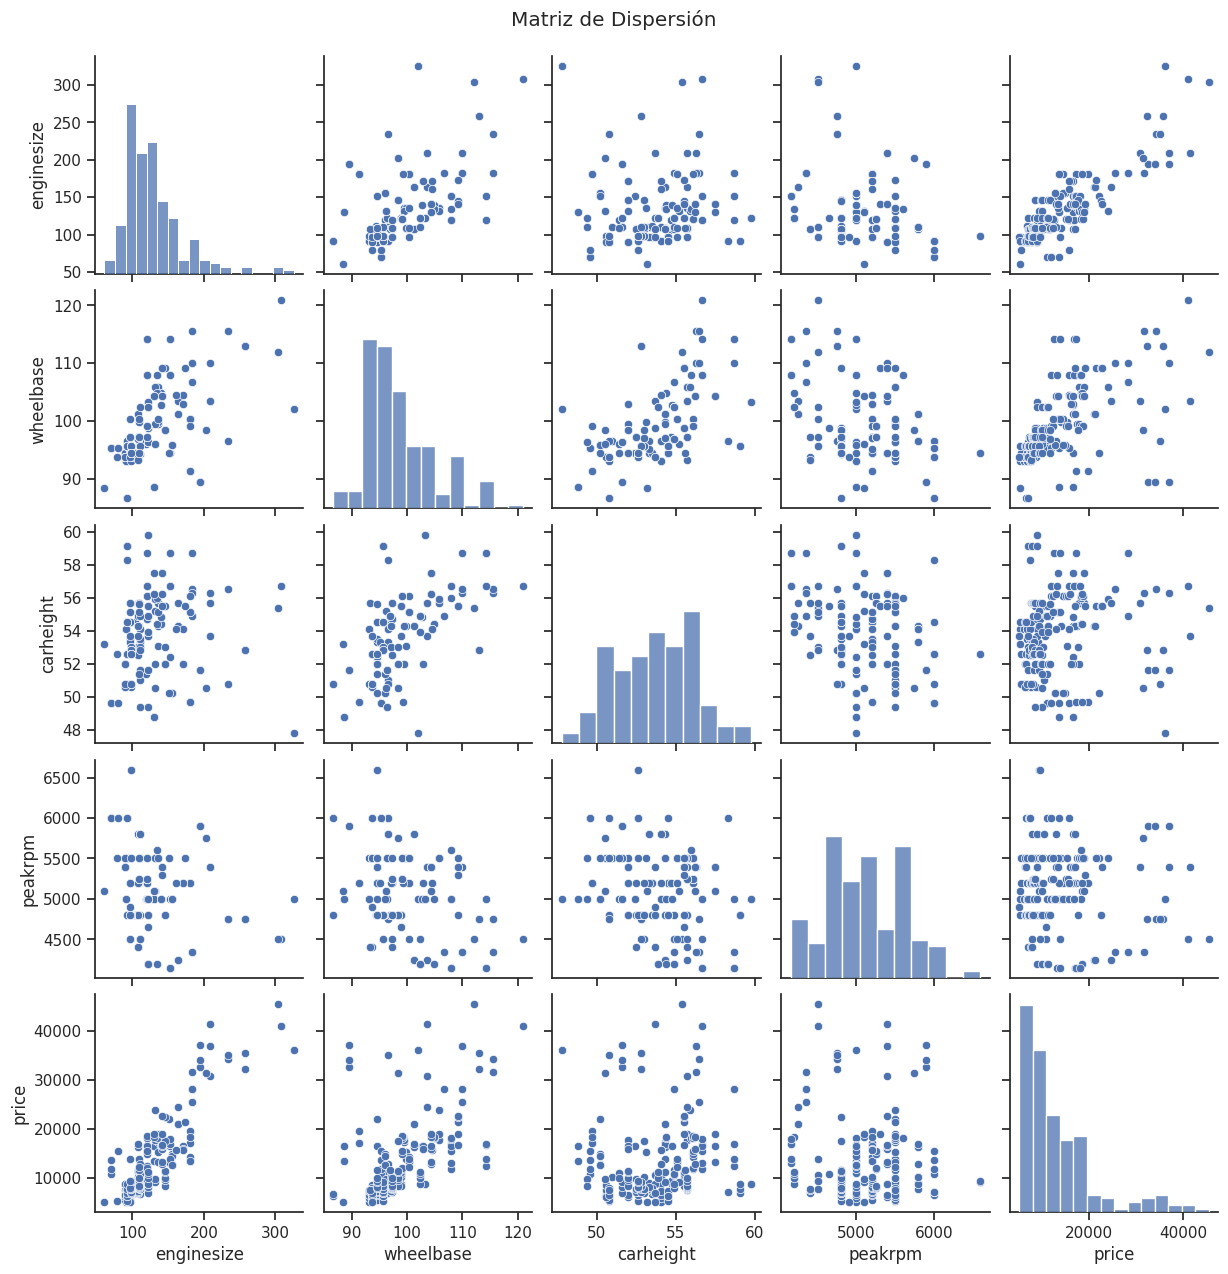

In [56]:
# Crea la matriz de dispersión
sns.set(style="ticks")
sns.pairplot(numeric_columns)
plt.suptitle("Matriz de Dispersión", y=1.02)
plt.show()

## Modelos estadísticos

### Regresión lineal múltiple

#### Modelo A

In [57]:
# Modelo A: RLM de price = enginesize + wheelbase + peakrpm
modelo_a = sm.OLS.from_formula("autos_df['price'] ~ autos_df['enginesize'] + autos_df['wheelbase'] + autos_df['peakrpm']", data=autos_df)
result = modelo_a.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      autos_df['price']   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     270.1
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.06e-70
Time:                        16:15:21   Log-Likelihood:                -1966.9
No. Observations:                 205   AIC:                             3942.
Df Residuals:                     201   BIC:                             3955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.512e+04   6326.572     -7.131      0.000   -5.76e+04   -3.26e+04
autos_df['enginesize']   156.7447      7.348     21.333      0.000     142.257     171.233
autos_df['wheelbase']    234.7686     52.817      4.445      0.000     130.622     338.916
autos_df['peakrpm']        2.9883      0.565      5.286      0.000       1.873       4.103
==============================================================================
Omnibus:                       23.280   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.414
Skew:                           0.675   Prob(JB):                     3.37e-08
Kurtosis:                       4.485   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Define variables predictoras y la variable objetivo
X = autos_df[['enginesize', 'wheelbase', 'peakrpm']]
y = autos_df['price']

# Ajusta tu modelo primero, por ejemplo:
modelo_a = sm.OLS(y, X).fit()

confidence_intervals = modelo_a.conf_int(alpha=0.04)
confidence_intervals

,0,1
enginesize,154.429025,187.109314
wheelbase,-153.523689,-34.670060
peakrpm,-0.750150,1.128024


#### Modelo B

In [59]:
# Modelo B: RLM de price = carheight + wheelbase + peakrpm
modelo_b = sm.OLS.from_formula("autos_df['price'] ~ autos_df['carheight'] + autos_df['wheelbase'] + autos_df['peakrpm']", data=autos_df)
result = modelo_b.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      autos_df['price']   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     48.05
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.86e-23
Time:                        16:15:21   Log-Likelihood:                -2077.1
No. Observations:                 205   AIC:                             4162.
Df Residuals:                     201   BIC:                             4175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -4.42e+04    1.3e+04     -3.403      0.001   -6.98e+04   -1.86e+04
autos_df['carheight'] -1053.6289    220.117     -4.787      0.000   -1487.663    -619.595
autos_df['wheelbase']  1067.0694     90.708     11.764      0.000     888.207    1245.931
autos_df['peakrpm']       1.6985      0.977      1.739      0.084      -0.227       3.624
==============================================================================
Omnibus:                      115.190   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.181
Skew:                           2.257   Prob(JB):                    3.09e-123
Kurtosis:                       9.759   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Define variables predictoras y la variable objetivo
X = autos_df[['carheight', 'wheelbase', 'peakrpm']]
y = autos_df['price']

# Ajusta tu modelo primero, por ejemplo:
modelo_b = sm.OLS(y, X).fit()

confidence_intervals = modelo_b.conf_int(alpha=0.04)
confidence_intervals

,0,1
carheight,-1874.685569,-1124.837949
wheelbase,794.052590,1162.486160
peakrpm,-2.065674,1.007703


#### Modelo C

In [64]:
# Filtra y selecciona las columnas de interés
M = autos_df[['enginesize', 'drivewheel', 'price']]
MR = M[M['drivewheel'] == 'rwd']
MF = M[M['drivewheel'] == 'fwd']
M4 = M[M['drivewheel'] == '4wd']

M1 = pd.DataFrame({'enginesize_rwd': MR['enginesize'], 'price_rwd': MR['price'], 'enginesize_fwd': MF['enginesize'], 'price_fwd': MF['price'], 'enginesize_4wd': M4['enginesize'], 'price_4wd': M4['price']})
M1

,enginesize_rwd,price_rwd,enginesize_fwd,price_fwd,enginesize_4wd,price_4wd
0,130.0,13495.0,NaN,NaN,NaN,NaN
1,130.0,16500.0,NaN,NaN,NaN,NaN
2,152.0,16500.0,NaN,NaN,NaN,NaN
3,NaN,NaN,109.0,13950.0,NaN,NaN
4,NaN,NaN,NaN,NaN,136.0,17450.0
...,...,...,...,...,...,...
200,141.0,16845.0,NaN,NaN,NaN,NaN
201,141.0,19045.0,NaN,NaN,NaN,NaN
202,173.0,21485.0,NaN,NaN,NaN,NaN
203,145.0,22470.0,NaN,NaN,NaN,NaN


In [65]:
# Modelo C: RLM de price = enginesize + dirvewheel
modelo_c = sm.OLS.from_formula("autos_df['price'] ~ autos_df['enginesize'] + autos_df['drivewheel']", data=autos_df)
result = modelo_c.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      autos_df['price']   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     262.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.07e-69
Time:                        16:19:35   Log-Likelihood:                -1969.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     201   BIC:                             3960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4829.7218   1458.548     -3.311      0.001   -7705.740   -1953.703
autos_df['drivewheel'][T.fwd] -1656.2169   1254.380     -1.320      0.188   -4129.650     817.216
autos_df['drivewheel'][T.rwd]  1971.1119   1326.626      1.486      0.139    -644.777    4587.001
autos_df['enginesize']          144.5557      7.399     19.537      0.000     129.966     159.145
==============================================================================
Omnibus:                       20.686   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.360
Skew:                           0.539   Prob(JB):                     1.27e-08
Kurtosis:                       4.760   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo D

In [66]:
# Modelo D: RLM de price = enginesize + enginetype
modelo_d = sm.OLS.from_formula("autos_df['price'] ~ autos_df['enginesize'] + autos_df['enginetype']", data=autos_df)
result = modelo_d.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      autos_df['price']   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.59e-68
Time:                        16:22:01   Log-Likelihood:                -1960.7
No. Observations:                 205   AIC:                             3937.
Df Residuals:                     197   BIC:                             3964.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1.223e+04   1583.824     -7.722      0.000   -1.54e+04   -9106.329
autos_df['enginetype'][T.dohcv]  4475.9787   3676.855      1.217      0.225   -2775.071    1.17e+04
autos_df['enginetype'][T.l]      1863.5368   1451.452      1.284      0.201    -998.840    4725.914
autos_df['enginetype'][T.ohc]    1132.7941   1099.301      1.030      0.304   -1035.113    3300.702
autos_df['enginetype'][T.ohcf]   1961.4469   1385.337      1.416      0.158    -770.548    4693.441
autos_df['enginetype'][T.ohcv]  -4467.0843   1480.496     -3.017      0.003   -7386.740   -1547.429
autos_df['enginetype'][T.rotor]  1.127e+04   2133.353      5.281      0.000    7058.943    1.55e+04
autos_df['enginesize']            192.8782      7.727     24.960      0.000     177.639     208.117
==============================================================================
Omnibus:                        9.034   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.621
Skew:                           0.357   Prob(JB):                      0.00494
Kurtosis:                       3.857   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANOVA

## Análisis de datos y Pregunta base

### 1. De acuerdo a la pregunta base, contempla la herramienta estadística necesaria para contestarla.





### 2. Selecciona al menos dos de las herramientas estadísticas que hemos analizado en el curso: regresión lineal simple y múltiple, anova o pruebas de hipótesis (medias o proporción). Justifica la elección de la herramienta estadística.

#### Condiciones para la regresión lineal múltiple

In [ ]:
correlation_matrix = autos_df[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg', 'citympg', 'price']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### Modelo de regresión lineal múltiple

### 3. Valida el modelo obtenido analizando los supuestos requeridos por el modelo.

### 4. Conclusión del análisis

In [ ]:
# Define the formula for linear regression
formula = "autos_df['price'] ~ autos_df['enginesize'] + autos_df['wheelbase'] + autos_df['peakrpm']"

# Fit the linear regression model
model = sm.OLS.from_formula(formula, data=autos_df)
result = model.fit()
print(result.summary())

In [ ]:
formula2 = "autos_df['price'] ~ autos_df['enginesize'] + autos_df['wheelbase']"

# Fit the linear regression model
model2 = sm.OLS.from_formula(formula2, data=autos_df)
result2 = model2.fit()
print(result2.summary())

In [ ]:
formula3 = "autos_df['price'] ~ autos_df['enginesize']"

# Fit the linear regression model
model3 = sm.OLS.from_formula(formula3, data=autos_df)
result3 = model3.fit()
print(result3.summary())